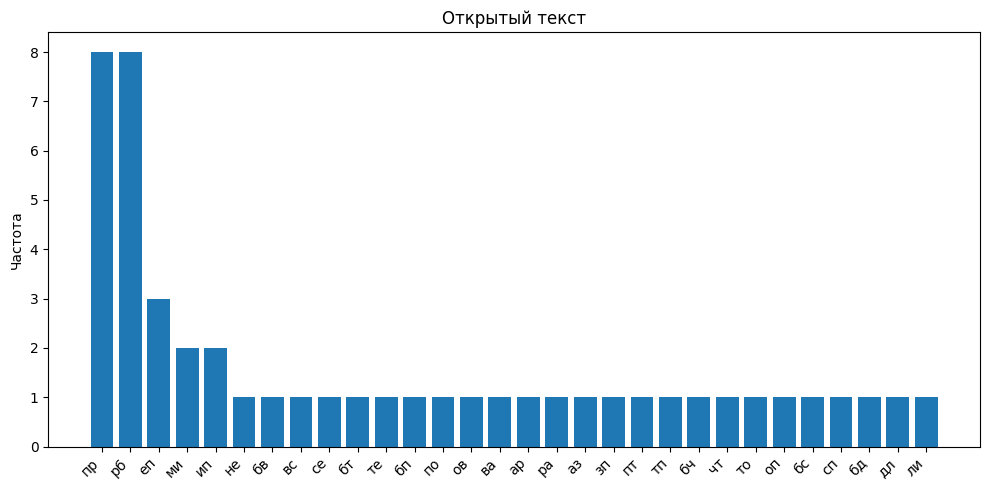

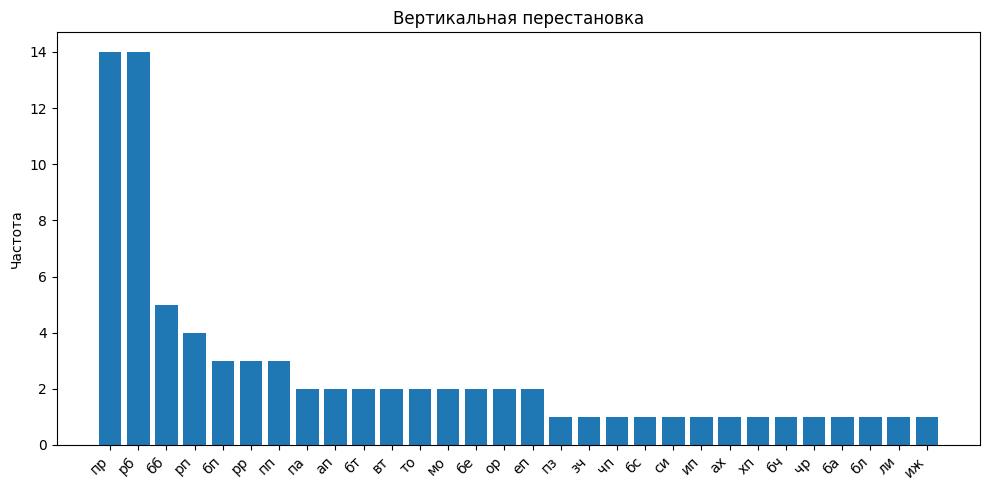

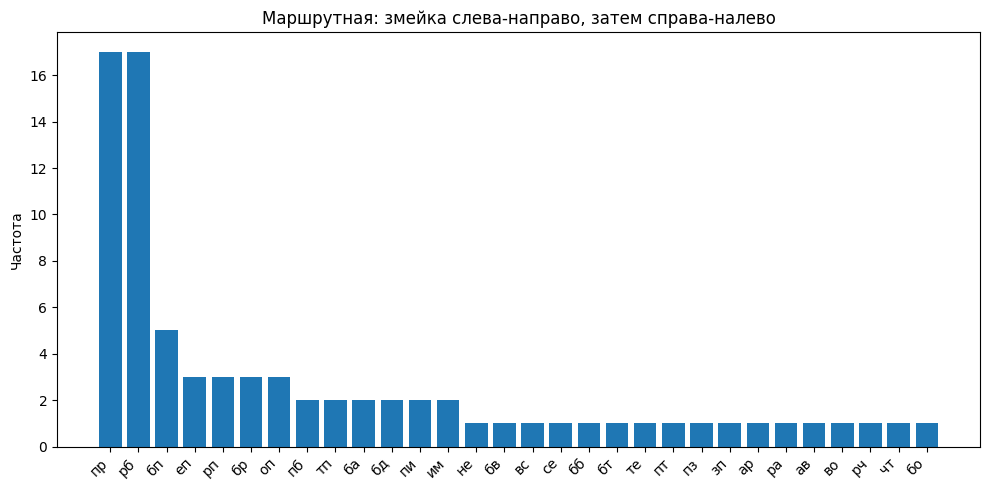

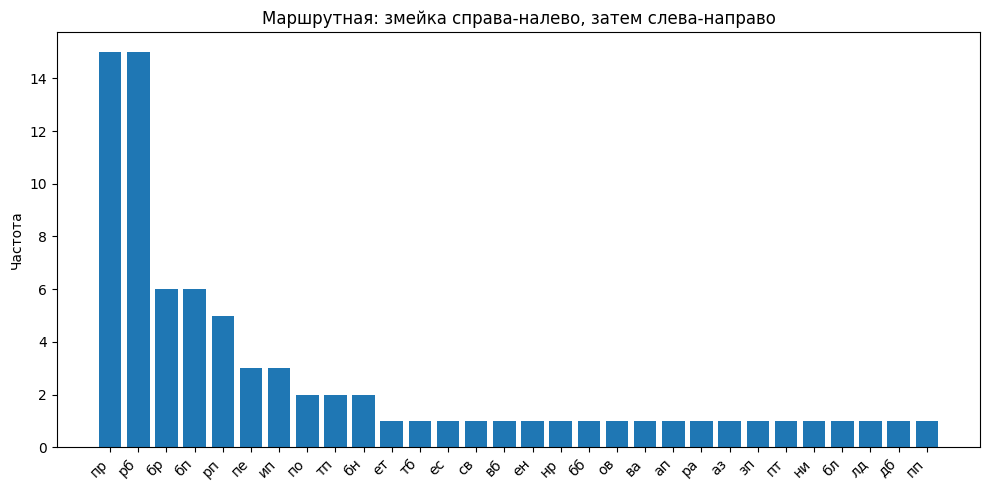

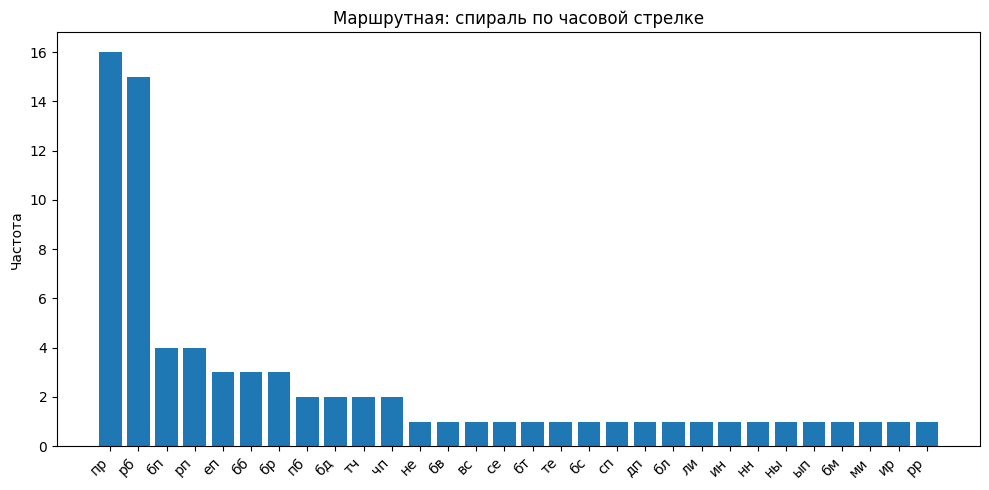

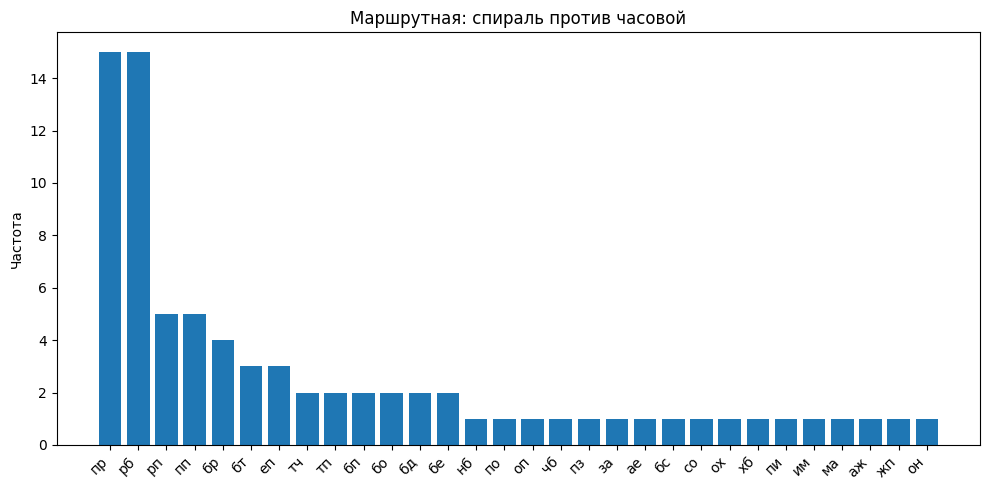

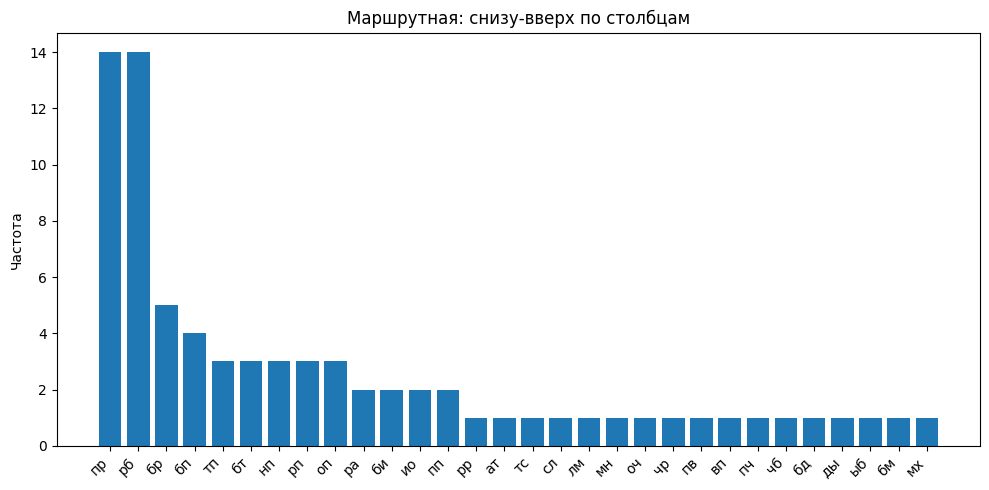

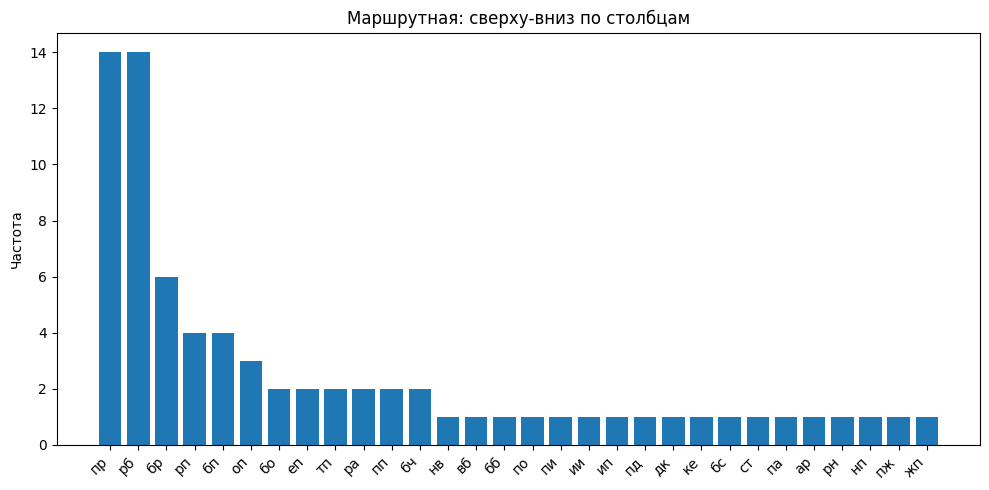

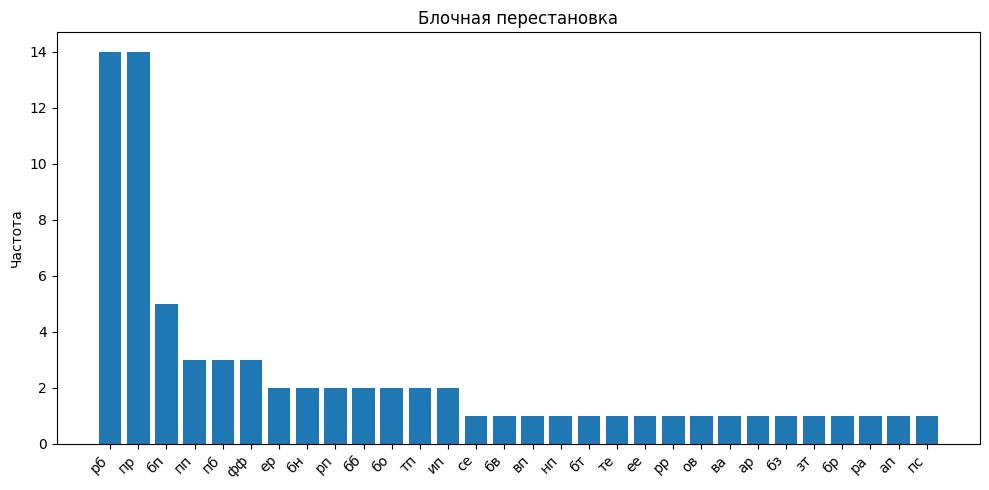

In [2]:
from collections import Counter
import matplotlib.pyplot as plt


def normalize_for_ngrams(text: str) -> str:
    """
    Нормализация под анализ:
    - к нижнему регистру
    - пробел -> 'прб'
    - ',' -> 'зпт'
    - '.' -> 'тчк'
    """
    text = text.lower()
    text = text.replace(" ", "прб").replace(",", "зпт").replace(".", "тчк")
    return text


def count_bigrams(text: str) -> Counter:
    text = normalize_for_ngrams(text)
    if len(text) < 2:
        return Counter()
    bigrams = [text[i: i + 2] for i in range(len(text) - 1)]
    return Counter(bigrams)


def plot_bigrams(counter: Counter, top_n: int, title: str):
    most_common = counter.most_common(top_n)
    if not most_common:
        print(f"Нет биграмм для: {title}")
        return

    labels = [b for b, _ in most_common]
    values = [c for _, c in most_common]

    plt.figure(figsize=(10, 5))
    plt.bar(range(len(labels)), values)
    plt.xticks(range(len(labels)), labels, rotation=45, ha="right")
    plt.ylabel("Частота")
    plt.title(title)
    plt.tight_layout()
    plt.show()


def load_texts_from_file(path: str):
    """
    1-я непустая строка — открытый текст.
    Далее — шифртексты, по одному на строку.
    Пустые строки игнорируются.
    """
    with open(path, "r", encoding="utf-8") as f:
        lines = [line.rstrip("\n") for line in f]

    # убираем полностью пустые строки
    non_empty = [l for l in lines if l.strip() != ""]
    if not non_empty:
        raise ValueError("Файл пуст.")

    open_text = non_empty[0]
    cipher_texts = non_empty[1:]
    return open_text, cipher_texts


def main():
    path = "open_and_encrypted_offers.txt"  # твой файл

    open_text, cipher_texts = load_texts_from_file(path)

    # подписи для графиков
    titles = [
        "Открытый текст",
        "Вертикальная перестановка",
        "Маршрутная: змейка слева-направо, затем справа-налево",
        "Маршрутная: змейка справа-налево, затем слева-направо",
        "Маршрутная: спираль по часовой стрелке",
        "Маршрутная: спираль против часовой",
        "Маршрутная: снизу-вверх по столбцам",
        "Маршрутная: сверху-вниз по столбцам",
        "Блочная перестановка",
    ]

    # 1) открытый текст
    open_big = count_bigrams(open_text)
    plot_bigrams(open_big, top_n=30, title=titles[0])

    # 2) шифртексты
    for i, ct in enumerate(cipher_texts, start=1):
        big = count_bigrams(ct)
        title = titles[i] if i < len(titles) else f"Шифртекст {i}"
        plot_bigrams(big, top_n=30, title=title)


if __name__ == "__main__":
    main()
